<a href="https://colab.research.google.com/github/frankl1/Introduction-to-Tensorflow-for-Deep-Learning/blob/master/classify_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import logging

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [63]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train, test = dataset["train"], dataset["test"]

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [64]:
num_train_examples, num_test_examples = metadata.splits["train"].num_examples, metadata.splits["test"].num_examples
print(f"Number of train examples {num_train_examples}")
print(f"Number of test examples {num_test_examples}")

Number of train examples 60000
Number of test examples 10000


In [0]:
def normalize(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

In [0]:
# Normalizing the dataset
train = train.map(normalize)
test = test.map(normalize)

# Cahing the dataset to speed up training
train = train.cache()
test = test.cache()

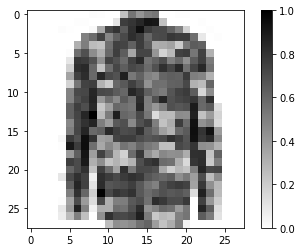

In [67]:
for image, label in train.take(1):
  break

image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

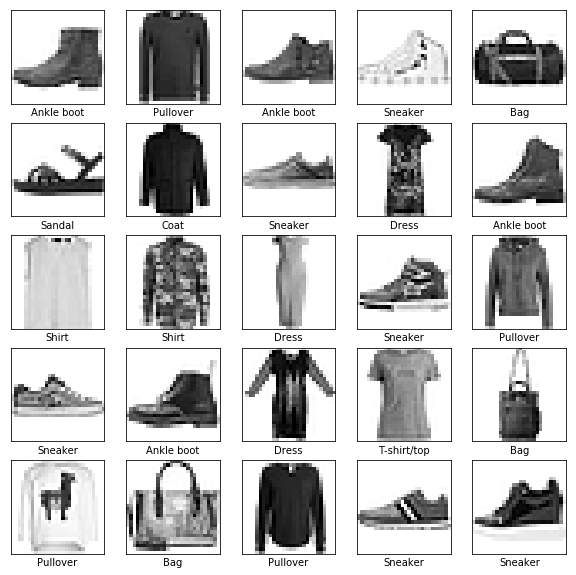

In [69]:
plt.figure(figsize=(10, 10))
i = 0
for image, label in train.take(25):
  image = image.numpy().reshape((28, 28))
  
  plt.subplot(5, 5, i+1)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[label])

  i += 1

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])